In [56]:
import pandas as pd
from PIL import Image
import base64
import io
from tqdm import tqdm
import json
from io import StringIO
from IPython.display import display, Markdown
from PIL import Image

# Load your DataFrame
pew = pd.read_csv('../dataset/pew_dataset/metadata.csv')
pew['imgPath'] = pew['imgPath'].str.replace('imgs', '../dataset/pew_dataset/pew_imgs')
statista = pd.read_csv('../dataset/statista_dataset/metadata.csv')
statista['imgPath'] = statista['imgPath'].str.replace('out/two_col/imgs', '../dataset/statista_dataset/statista_imgs')
columns = ['title','caption','imgPath']

# Filtering the DataFrame to include only the specified columns
pew_df = pew[columns]
statista_df = statista[columns]
combined_df = pd.concat([pew_df, statista_df], ignore_index=True)

# Add a new column 'ID' to the DataFrame at the first position
combined_df.insert(0, 'id', combined_df.reset_index().index + 1)


In [40]:
combined_df.head()

,id,title,caption,imgPath
0,1,"Foreign-born population in the United States, 1850-2018","The foreign-born population residing in the U.S. reached a record 44.8 million, or 13.7% of the U.S. population, in 2018. This immigrant population has more than quadrupled since the 1960s, when the 1965 Immigration and Naturalization Act took effect. Though growth has begun to slow in recent years, the number of immigrants living in the United States is projected to almost double by 2065.",../dataset/pew_dataset/pew_imgs/1.png
1,2,"English proficiency among U.S. immigrants, 1980-2018","Since 1980, the share of immigrants who are proficient in English (those who speak only English at home or speak English at least “very well”) has declined, though it has increased slightly in recent years. This decline has been driven entirely by those who speak only English at home, which fell from 30% of immigrants ages 5 and older in 1980 to 17% in 2018. The share who speaks English “very well,” meanwhile, has increased slightly, from 27% to 37% over the same time period.",../dataset/pew_dataset/pew_imgs/2.png
2,3,"Languages spoken among U.S. immigrants, 2018","Among the nation’s immigrants, Spanish is by far the most spoken non-English language (42% of immigrants say they speak Spanish at home), but it is not the only non-English language spoken by immigrants. Some 6% of immigrants speak Chinese (including Mandarin and Cantonese), 5% speak Hindi or a related language, 4% speak Filipino or Tagalog, 3% speak Vietnamese, 3% speak French and 2% speak Dravidian.",../dataset/pew_dataset/pew_imgs/3.png
3,4,"Hispanic population in the U.S., 2000-2017","There were nearly 60 million Latinos in the United States in 2017, accounting for approximately 18% of the total U.S. population. In 1980, with a population of 14.8 million, Hispanics made up just 6.5% of the total U.S. population. For more, read the accompanying blog post, “Key facts about U.S. Hispanics and their diverse heritage.” For facts on the foreign-born population in the United States, see our profile on U.S. immigrants.",../dataset/pew_dataset/pew_imgs/4.png
4,5,Weekly broadcast audience for top 20 NPR-affiliated radio stations,"The top 20 NPR-affiliated public radio stations (by listenership) had on average a total weekly listenership of about 11 million in 2018, about the same as in 2017. (This includes listeners of NPR programming as well as original or other syndicated content aired on these stations.)",../dataset/pew_dataset/pew_imgs/5.png


In [42]:
# Function to encode image to Base64
def image_to_base64(image_path):
    with Image.open(image_path) as img:
        buffer = io.BytesIO()
        img.save(buffer, format="PNG")
        return base64.b64encode(buffer.getvalue()).decode("utf-8")

In [ ]:
# Use tqdm to show progress
tqdm.pandas()

# Add Base64-encoded image data to DataFrame
combined_df['image_data'] = combined_df['imgPath'].progress_apply(image_to_base64)

# Drop the 'imgPath' column if you no longer need it
combined_df.drop(columns=['imgPath'], inplace=True)

# Convert DataFrame to JSON object
json_data = combined_df.to_json(orient='records')


100%|██████████| 29354/29354 [14:31<00:00, 33.68it/s]


Title: Foreign-born population in the United States, 1850-2018

Caption: The foreign-born population residing in the U.S. reached a record 44.8 million, or 13.7% of the U.S. population, in 2018. This immigrant population has more than quadrupled since the 1960s, when the 1965 Immigration and Naturalization Act took effect. Though growth has begun to slow in recent years, the number of immigrants living in the United States is projected to almost double by 2065.

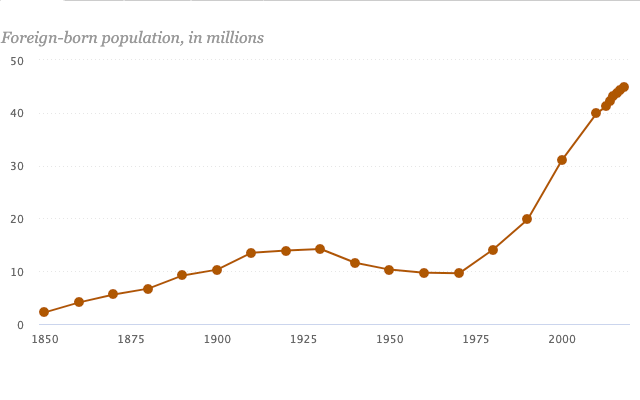

Title: English proficiency among U.S. immigrants, 1980-2018

Caption: Since 1980, the share of immigrants who are proficient in English (those who speak only English at home or speak English at least “very well”) has declined, though it has increased slightly in recent years. This decline has been driven entirely by those who speak only English at home, which fell from 30% of immigrants ages 5 and older in 1980 to 17% in 2018. The share who speaks English “very well,” meanwhile, has increased slightly, from 27% to 37% over the same time period.

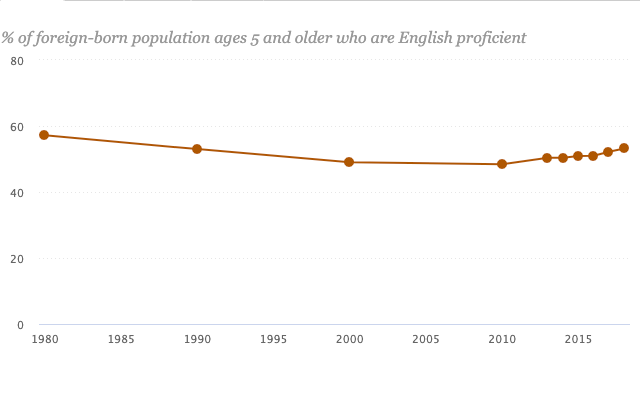

Title: Languages spoken among U.S. immigrants, 2018

Caption: Among the nation’s immigrants, Spanish is by far the most spoken non-English language (42% of immigrants say they speak Spanish at home), but it is not the only non-English language spoken by immigrants. Some 6% of immigrants speak Chinese (including Mandarin and Cantonese), 5% speak Hindi or a related language, 4% speak Filipino or Tagalog, 3% speak Vietnamese, 3% speak French and 2% speak Dravidian.

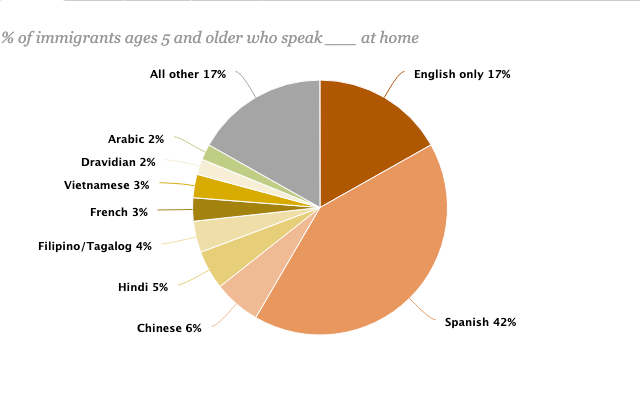

In [59]:
# Wrap the JSON data string in a StringIO object
json_io = StringIO(json_data)

# Load JSON data into DataFrame
df = pd.read_json(json_io)

# Display title, caption, and image
for index, row in df.head(3).iterrows():
    # Decode Base64 image data
    image_data = io.BytesIO(base64.b64decode(row['image_data']))
    
    # Open image using Pillow
    image = Image.open(image_data)
    
    # Display title and caption
    display(Markdown(f"Title: {row['title']}"))
    display(Markdown(f"Caption: {row['caption']}"))
    
    # Display image
    display(image)

In [60]:
# Specify the file path where you want to save the JSON data
json_file_path = '../dataset/combined_data.json'


# Write the JSON data to the file
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

In [61]:
import json

# Load JSON data into a Python object
json_obj = json.loads(json_data)

# Remove 'title' and 'caption' fields from each record in the JSON object
for record in json_obj:
    del record['title']
    del record['caption']

# Convert modified Python object back to JSON format
images_data = json.dumps(json_obj)


In [62]:
# Count the number of records (number of images)
num_images = len(json_obj)

print("Number of images:", num_images)


Number of images: 29354


In [63]:
# Check the fields present in the first record of json_obj
first_record = json_obj[0]
fields = list(first_record.keys())
print("Fields in each record:", fields)

Fields in each record: ['id', 'image_data']


In [64]:
# Specify the file path where you want to save the JSON data
json_file_path = '../dataset/image_data.json'


# Write the JSON data to the file
with open(json_file_path, 'w') as json_file:
    json_file.write(images_data)